In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\HP\\Downloads\\Flight_Booking.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [3]:
np.product(df.shape)

3601836

In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.isnull().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


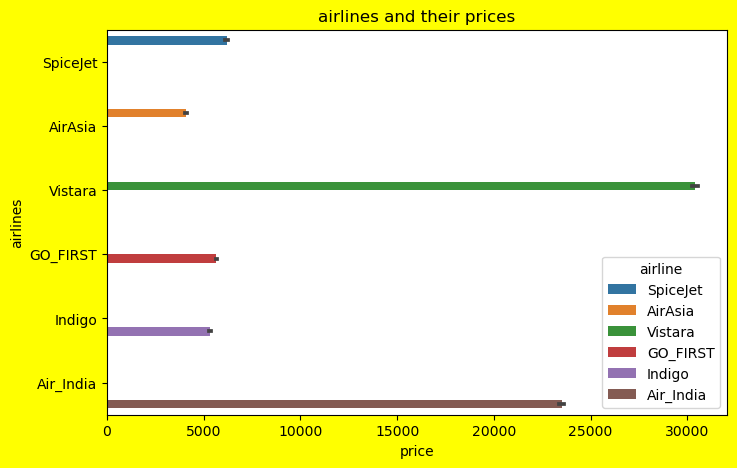

In [7]:
plt.figure(figsize=(8,5),facecolor="yellow")
sns.barplot(x=df["price"],y=df["airline"],data=df,hue="airline")
plt.title("airlines and their prices")
plt.xlabel("price")
plt.ylabel("airlines")
plt.show()

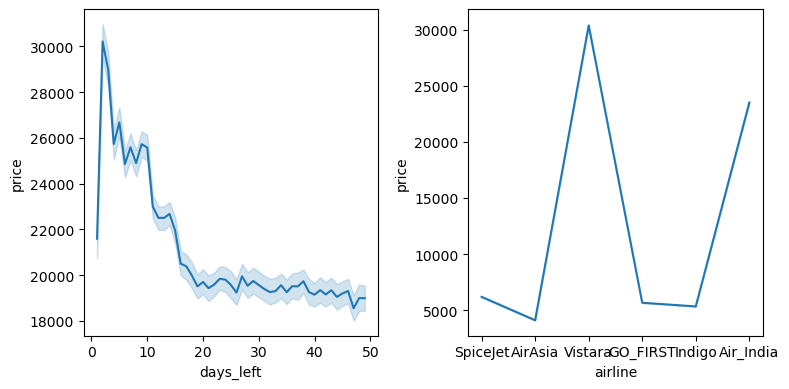

In [8]:
figure2,ax=plt.subplots(nrows=1,ncols=2,figsize=(8,4))
sns.lineplot(x=df.days_left,y=df.price,ax=ax[0])
sns.lineplot(x=df.airline,y=df.price,ax=ax[1])
plt.tight_layout()

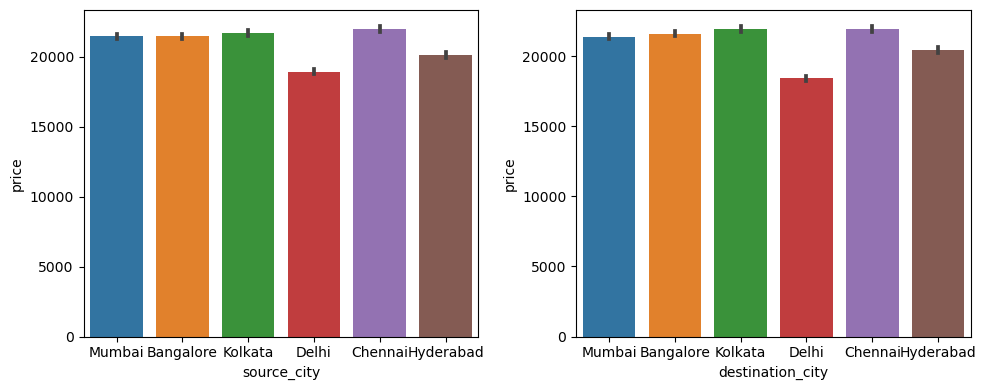

In [9]:
city_order=["Mumbai","Bangalore","Kolkata","Delhi","Chennai","Hyderabad"]
figure3,axes3=plt.subplots(1,2,figsize=(10,4))
sns.barplot(x=df.source_city,y=df.price,ax=axes3[0],order=city_order)
sns.barplot(x=df.destination_city,y=df.price,ax=axes3[1],order=city_order)
plt.tight_layout()

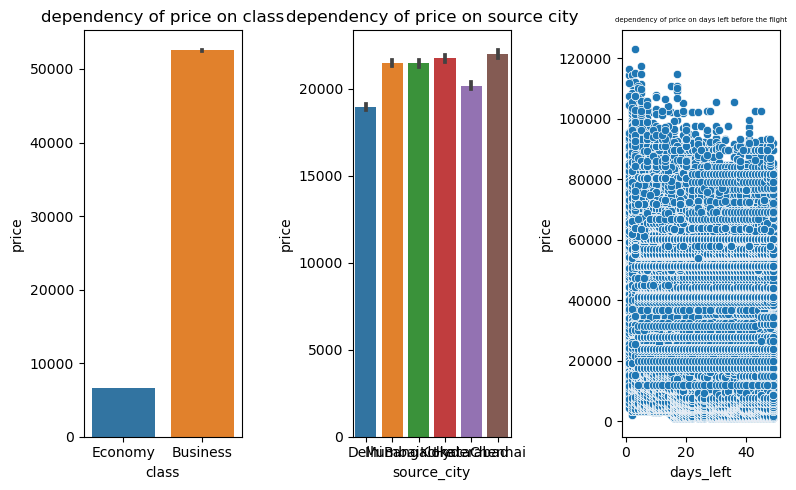

In [10]:
figure4,axes=plt.subplots(1,3,figsize=(8,5))
sns.barplot(x=df["class"],y=df["price"],ax=axes[0])
axes[0].set_title("dependency of price on class")
sns.barplot(x=df["source_city"],y=df["price"],ax=axes[1])
axes[1].set_title("dependency of price on source city")
sns.scatterplot(x=df["days_left"],y=df["price"],ax=axes[2])
axes[2].set_title("dependency of price on days left before the flight",fontsize="5")
plt.tight_layout()


Text(0.5, 1.0, 'duration and price')

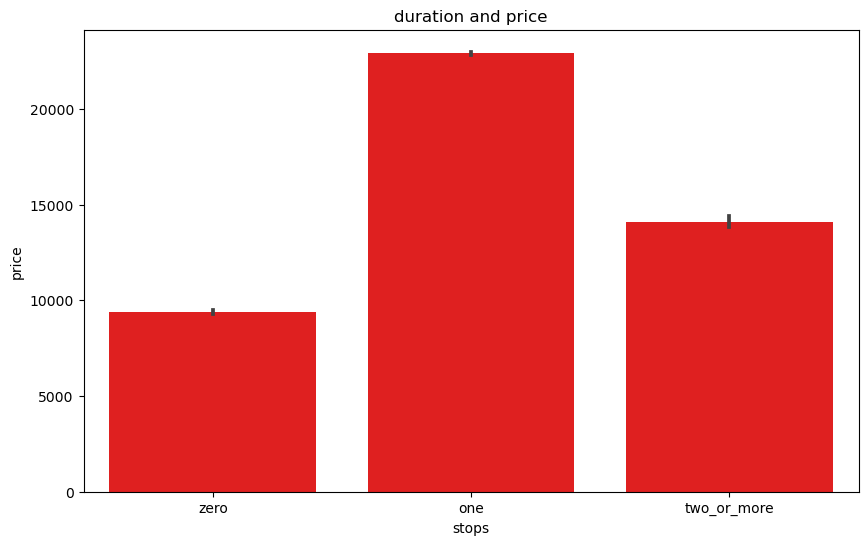

In [11]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["stops"],y=df["price"],color="red")
plt.title("duration and price")


<Axes: xlabel='days_left', ylabel='price'>

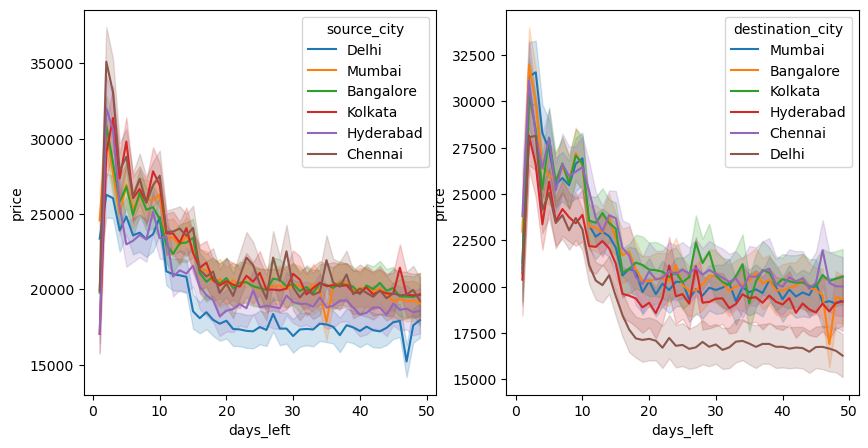

In [12]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.lineplot(x="days_left",y="price",data=df,hue="source_city",ax=ax[0])
sns.lineplot(x="days_left",y="price",data=df,hue="destination_city",ax=ax[1])

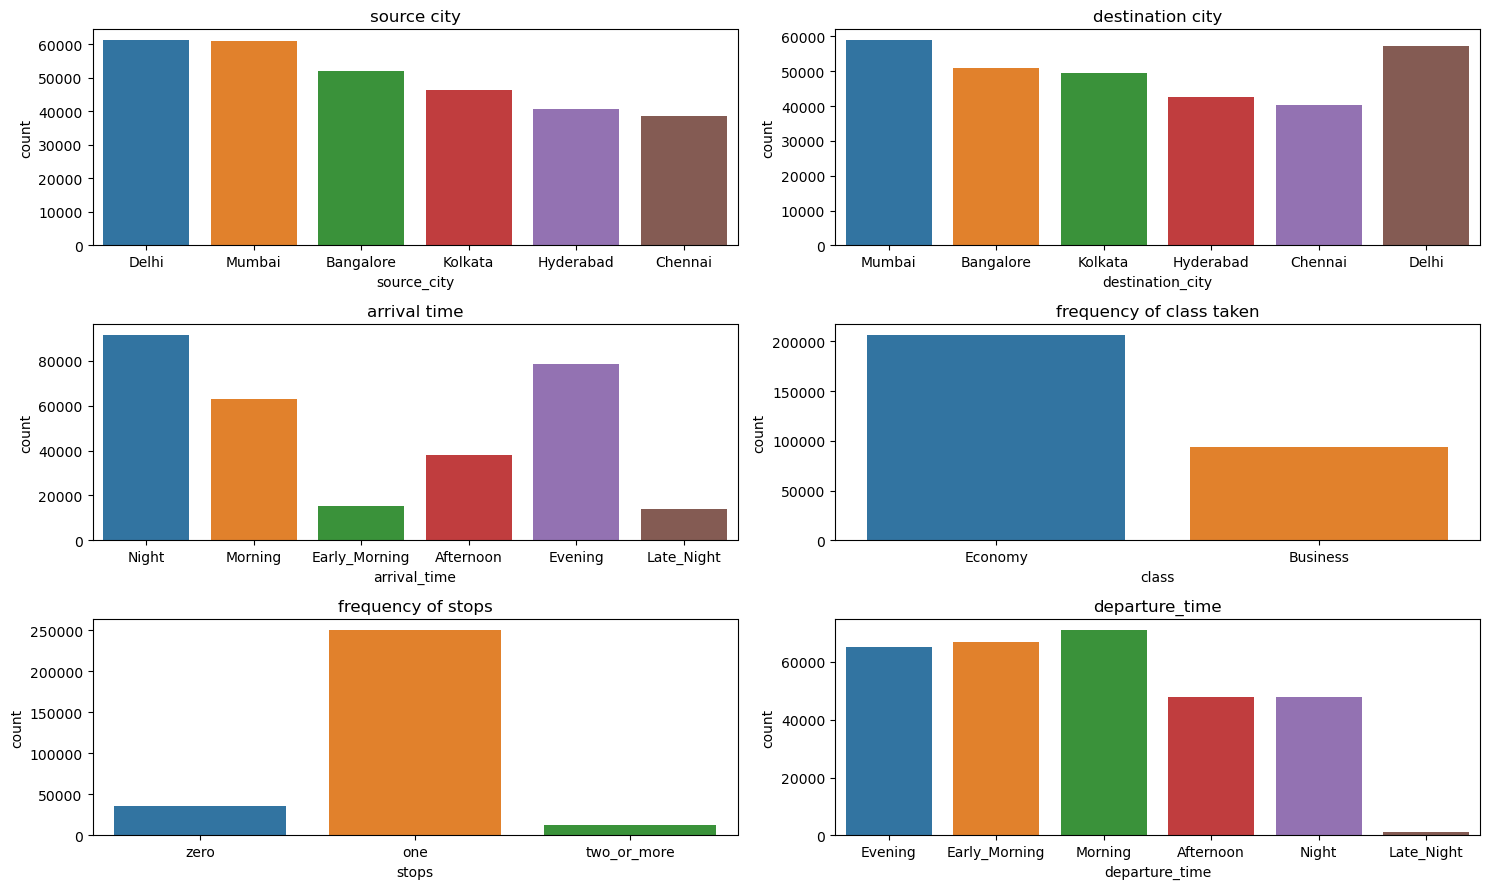

In [13]:
plt.figure(figsize=(15,9))

plt.subplot(3,2,1)
sns.countplot(x=df["source_city"],data=df)
plt.title("source city")

plt.subplot(3,2,2)
sns.countplot(x=df["destination_city"],data=df)
plt.title("destination city")

plt.subplot(3,2,3)
sns.countplot(x=df["arrival_time"],data=df)
plt.title("arrival time")

plt.subplot(3,2,4)
sns.countplot(x=df["class"],data=df)
plt.title("frequency of class taken")

plt.subplot(3,2,5)
sns.countplot(x=df["stops"],data=df)
plt.title("frequency of stops")

plt.subplot(3,2,6)
sns.countplot(x=df["departure_time"],data=df)
plt.title("departure_time")

plt.tight_layout()

<Axes: >

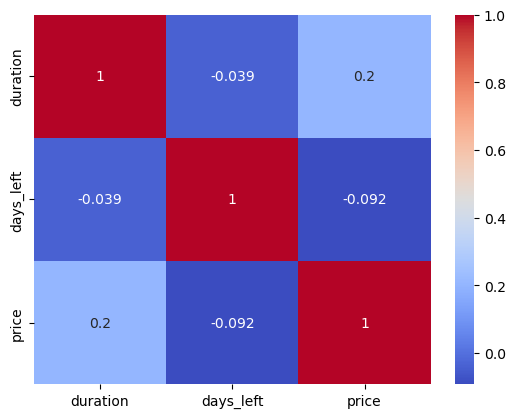

In [14]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [15]:
df.corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [16]:
df["stops"]=df["stops"].replace(["zero","one","two_or_more"],[0,1,2])
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,0,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,0,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,0,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,0,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,0,Morning,Mumbai,Economy,2.33,1,5955


In [17]:
df.stops.nunique()

3

<Axes: >

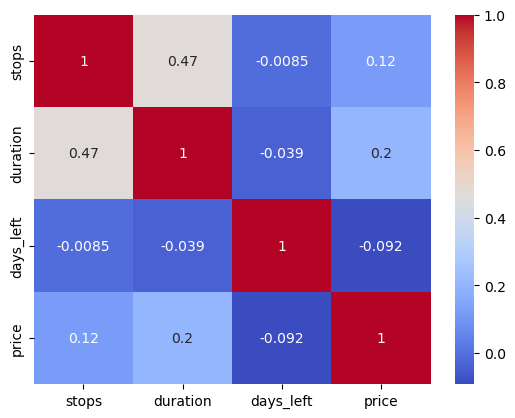

In [18]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
df["airline"]=le.fit_transform(df["airline"])
df["source_city"]=le.fit_transform(df["source_city"])
df["destination_city"]=le.fit_transform(df["destination_city"])
df["arrival_time"]=le.fit_transform(df["arrival_time"])
df["departure_time"]=le.fit_transform(df["departure_time"])
df["class"]=le.fit_transform(df["class"])

In [21]:
df[30:40]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
30,2,G8-165,2,1,1,0,5,1,8.00,1,10575
31,3,6E-2373,2,0,1,2,5,1,6.00,1,10838
32,5,UK-813,2,2,1,4,5,1,14.67,1,12150
33,5,UK-817,2,2,1,4,5,1,16.17,1,12150
34,5,UK-819,2,0,1,4,5,1,18.00,1,12150
35,5,UK-801,2,4,1,4,5,1,23.17,1,12150
36,5,UK-815,2,4,1,4,5,1,24.17,1,12150
37,1,AI-453,2,1,1,0,5,1,8.83,1,11900
38,4,SG-2976,2,2,1,5,5,1,4.50,1,12123
39,4,SG-2976,2,2,1,4,5,1,15.25,1,12123


In [22]:
df["class"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 300153 entries, 0 to 300152
Series name: class
Non-Null Count   Dtype
--------------   -----
300153 non-null  int32
dtypes: int32(1)
memory usage: 1.1 MB


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

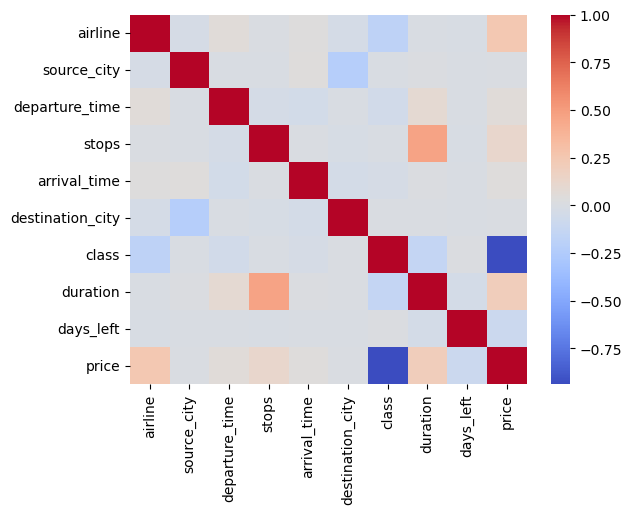

In [23]:
sns.heatmap(df.corr(),annot=False,cmap="coolwarm")
plt.tight_layout

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int32  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int32  
 3   departure_time    300153 non-null  int32  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int32  
 6   destination_city  300153 non-null  int32  
 7   class             300153 non-null  int32  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int32(6), int64(3), object(1)
memory usage: 18.3+ MB


In [25]:
df.drop(["flight"],axis=1,inplace=True)

In [26]:
df.head(2)

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,0,5,5,1,2.17,1,5953
1,4,2,1,0,4,5,1,2.33,1,5953


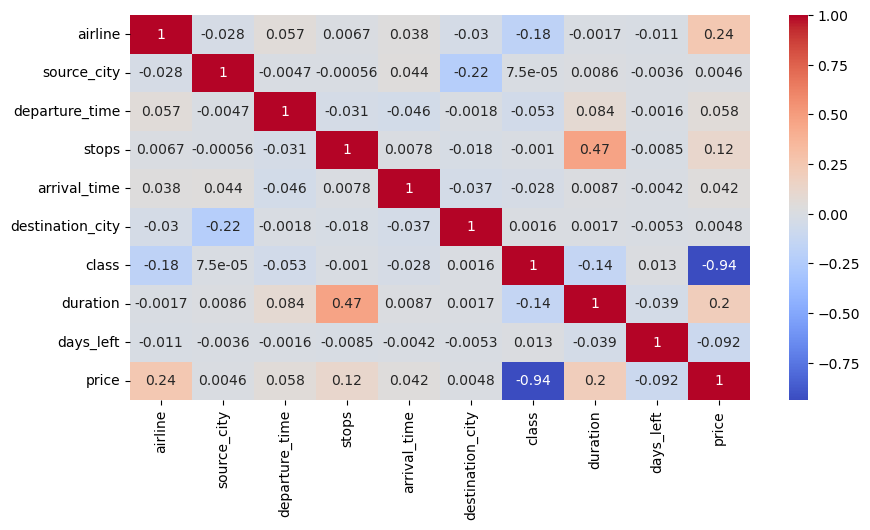

In [27]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.show()

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
    if ((df[col].dtype!="object")& (col!="price")):
        col_list.append(col)
x=df[col_list]
vif_data=pd.DataFrame()
vif_data["features"]=x.columns
vif_data["VIF"]=[variance_inflation_factor(x.values,i) for i in range (len(x.columns))]
print(vif_data)

           features       VIF
0           airline  3.461766
1       source_city  2.933064
2    departure_time  2.746367
3             stops  7.464236
4      arrival_time  3.684695
5  destination_city  2.893218
6             class  2.917521
7          duration  5.037943
8         days_left  4.035735


In [29]:
df.drop(["stops"],axis=1,inplace=True)

In [30]:
df.isnull().values.any()
df.dropna(inplace=True)

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
lr=LinearRegression()
svr=SVR()
rf=RandomForestRegressor()
bag=BaggingRegressor()

In [32]:
target=df.price
x=df.drop("price",axis=1)

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,target,test_size=0.2,random_state=25)
print(f"x_train:{x_train.shape}")
print(f"y_train:{y_train.shape}")
print(f"x_test:{x_test.shape}")
print(f"y_test:{y_test.shape}")

x_train:(240122, 8)
y_train:(240122,)
x_test:(60031, 8)
y_test:(60031,)


In [34]:
lr_train=lr.fit(x_train,y_train)

In [35]:
lr_pred=lr.predict(x_test)

In [36]:
lr_pred

array([ 5538.26878453, 13422.53523105,  5996.60440633, ...,
       56495.81916457,  6435.9756671 , 57498.90739024])

MAE==Average of the absolute differences between the predicted and actual values.

MSE==Average of the squared differences between the predicted and actual values.

R2 score==The closer R2 score is to 1, the better the model fits the data.

In [37]:
from sklearn import metrics

print(f"Mean Absolute Error (MAE):{metrics.mean_absolute_error(y_test, lr_pred)}") 
print(f"Mean Squared Error (MSE):{metrics.mean_squared_error(y_test, lr_pred)}") 
print(f"Root Mean Squared Error (RMSE):{np.sqrt(metrics.mean_squared_error(y_test, lr_pred))}")
print(f"R2_score:{metrics.r2_score(y_test, lr_pred)}")
print(f"Root Mean Squared Log Error (RMSLE):{np.log(np.sqrt(metrics.mean_squared_error(y_test, lr_pred)))}")

Mean Absolute Error (MAE):4478.039813638964
Mean Squared Error (MSE):52696691.09150913
Root Mean Squared Error (RMSE):7259.248658883998
R2_score:0.8969262745876222
Root Mean Squared Log Error (RMSLE):8.890031611951484


In [38]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [39]:
rf_pred=rf.predict(x_test)
rf_pred

array([ 5947.81  ,  9182.09  ,  4520.16  , ..., 60196.15  ,  7566.5565,
       65183.6   ])

In [40]:
print(f"Mean Absolute Error (MAE):{metrics.mean_absolute_error(y_test, rf_pred)}") 
print(f"Mean Squared Error (MSE):{metrics.mean_squared_error(y_test, rf_pred)}") 
print(f"Root Mean Squared Error (RMSE):{np.sqrt(metrics.mean_squared_error(y_test, rf_pred))}")
print(f"R2_score:{metrics.r2_score(y_test, rf_pred)}")
print(f"Root Mean Squared Log Error (RMSLE):{np.log(np.sqrt(metrics.mean_squared_error(y_test,rf_pred)))}")

Mean Absolute Error (MAE):1127.8327476808938
Mean Squared Error (MSE):8007760.903704503
Root Mean Squared Error (RMSE):2829.798739081015
R2_score:0.984336971990839
Root Mean Squared Log Error (RMSLE):7.947960871175851


In [41]:
bag.fit(x_train,y_train)

BaggingRegressor()

In [42]:
bag_pred=bag.predict(x_test)

In [43]:
print(f"Mean Absolute Error (MAE):{metrics.mean_absolute_error(y_test, bag_pred)}") 
print(f"Mean Squared Error (MSE):{metrics.mean_squared_error(y_test, bag_pred)}") 
print(f"Root Mean Squared Error (RMSE):{np.sqrt(metrics.mean_squared_error(y_test, bag_pred))}")
print(f"R2_score:{metrics.r2_score(y_test, bag_pred)}")
print(f"Root Mean Squared Log Error (RMSLE):{np.log(np.sqrt(metrics.mean_squared_error(y_test,bag_pred)))}")

Mean Absolute Error (MAE):1160.6252341905094
Mean Squared Error (MSE):8569345.800362216
Root Mean Squared Error (RMSE):2927.3444963588104
R2_score:0.9832385226150837
Root Mean Squared Log Error (RMSLE):7.981850975823239


In [44]:
#training model with Random forest resgressor as it is showing good R2 score and low error values.
df

,airline,source_city,departure_time,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,5,5,1,2.17,1,5953
1,4,2,1,4,5,1,2.33,1,5953
2,0,2,1,1,5,1,2.17,1,5956
3,5,2,4,0,5,1,2.25,1,5955
4,5,2,4,4,5,1,2.33,1,5955
...,...,...,...,...,...,...,...,...,...
300148,5,1,4,2,3,0,10.08,49,69265
300149,5,1,0,5,3,0,10.42,49,77105
300150,5,1,1,5,3,0,13.83,49,79099
300151,5,1,1,2,3,0,10.00,49,81585


In [45]:
price=pd.DataFrame({"actual_price":y_test,
            "predicted_price":rf_pred}
                  )
final=df.merge(price,left_index=True,right_index=True)

final["predicted_price"]=final["predicted_price"].astype(int)
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60031 entries, 17 to 300149
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           60031 non-null  int32  
 1   source_city       60031 non-null  int32  
 2   departure_time    60031 non-null  int32  
 3   arrival_time      60031 non-null  int32  
 4   destination_city  60031 non-null  int32  
 5   class             60031 non-null  int32  
 6   duration          60031 non-null  float64
 7   days_left         60031 non-null  int64  
 8   price             60031 non-null  int64  
 9   actual_price      60031 non-null  int64  
 10  predicted_price   60031 non-null  int32  
dtypes: float64(1), int32(7), int64(3)
memory usage: 3.9 MB


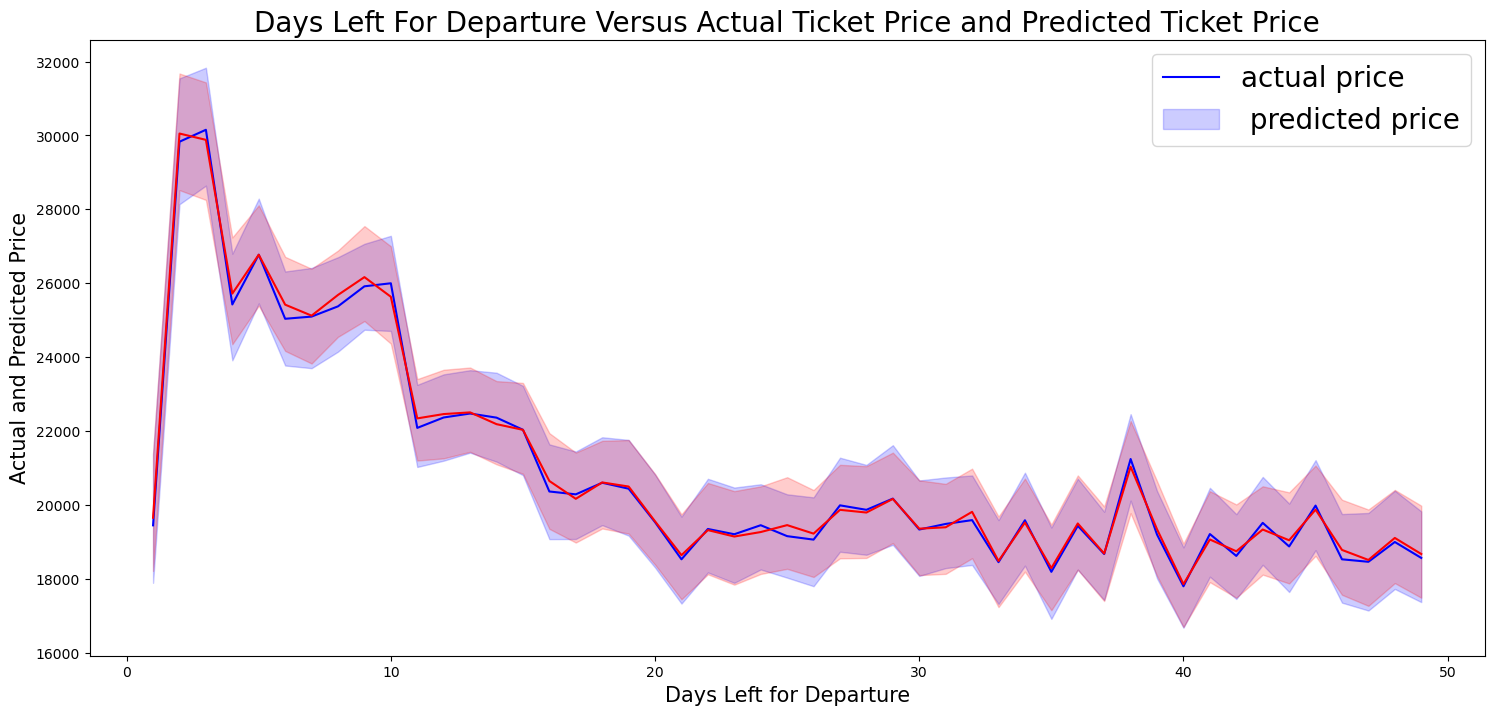

In [46]:
plt.figure(figsize=(18,8))
sns.lineplot(data=final,x='days_left',y='actual_price',color='blue')
sns.lineplot(data=final,x='days_left',y='predicted_price',color='red')
plt.title('Days Left For Departure Versus Actual Ticket Price and Predicted Ticket Price',fontsize=20)
plt.legend(labels=['actual price',' predicted price'],fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Actual and Predicted Price',fontsize=15)
plt.show()

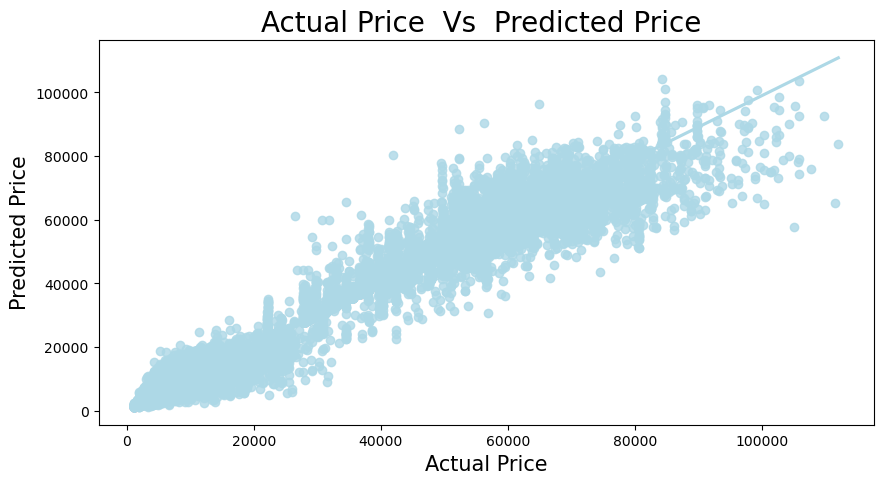

In [47]:
plt.figure(figsize=(10,5))
sns.regplot(x='actual_price',y='predicted_price',data=final,color='lightblue')
plt.title('Actual Price  Vs  Predicted Price ',fontsize=20)
plt.xlabel('Actual Price',fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()

In [ ]:
#here we have compared actual and predicted price.